In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score ,f1_score,roc_curve,precision_recall_curve
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from data_prep import df_prep  
from data_prep import  NLP_Vectorizer
from data_prep import parse_line
from model_src import NLP_model
import time
plt.style.use('fivethirtyeight')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/nathan/nltk_data...
[nltk_data]    |   Package movie_reviews is already

In [2]:
col_names = ['marketplace','customer_id','review_id','product_id','product_parent','product_title','product_category','star_rating','helpful_votes','total_votes','vine','verified_purchase','review_headline','review_body','review_date']
cols = {}
for i in range(len(col_names)):
    print (str(i)+': '+col_names[i])
    cols[col_names[i]] = i

0: marketplace
1: customer_id
2: review_id
3: product_id
4: product_parent
5: product_title
6: product_category
7: star_rating
8: helpful_votes
9: total_votes
10: vine
11: verified_purchase
12: review_headline
13: review_body
14: review_date


In [3]:
np.random.seed(500)
df = pd.read_csv('data/Spark_Pulls/us_Books_v1_02.csv')


df = df.sample(frac=.1, random_state=1)
len(df)

6672

In [4]:
#Corpus = df_prep(df,np.mean(df['8']/df['9']),.0)
Corpus = pd.read_csv('data/Books_02_Corpus.csv')
Corpus['text_final'] = Corpus['text_final'].fillna(' ')
#Corpus  = Corpus.sample(frac=.01, random_state=1)

In [5]:
len(Corpus)

66723

In [6]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus[['text','text_final','help_score','help_votes','stars']],Corpus['label'],test_size=0.3)



In [7]:
Train_X.isna().sum()

text          0
text_final    0
help_score    0
help_votes    0
stars         0
dtype: int64

In [8]:
CV_2K = NLP_Vectorizer('CV',{'max_features':2000,'ngram_range':(1,3)})
TF_IDF_2K =NLP_Vectorizer('TF_IDF',{'max_features':2000,'ngram_range':(1,3)})

CV_4K = NLP_Vectorizer('CV',{'max_features':4000,'ngram_range':(1,3)})
TF_IDF_4K =NLP_Vectorizer('TF_IDF',{'max_features':4000,'ngram_range':(1,3)}) 

CV_400 = NLP_Vectorizer('CV',{'max_features':400,'ngram_range':(1,3)})
TF_IDF_400 =NLP_Vectorizer('TF_IDF',{'max_features':400,'ngram_range':(1,3)})



orig_Train_Y = Train_Y
Test_Y = CV_2K.encode_Y(Test_Y)
Train_Y = CV_2K.encode_Y(Train_Y)

CV_2K.fit(Train_X['text_final'])
Train_X_Vector_CV_2K = CV_2K.transform(Train_X['text_final'])
Test_X_Vector_CV_2K = CV_2K.transform(Test_X['text_final'])

CV_4K.fit(Train_X['text_final'])
Train_X_Vector_CV_4K = CV_4K.transform(Train_X['text_final'])
Test_X_Vector_CV_4K = CV_4K.transform(Test_X['text_final'])

CV_400.fit(Train_X['text_final'])
Train_X_Vector_CV_400 = CV_400.transform(Train_X['text_final'])
Test_X_Vector_CV_400 = CV_400.transform(Test_X['text_final'])

TF_IDF_2K.fit(Train_X['text_final'])
Train_X_Vector_TF_IDF_2K = TF_IDF_2K.transform(Train_X['text_final'])
Test_X_Vector_TF_IDF_2K = TF_IDF_2K.transform(Test_X['text_final'])

TF_IDF_4K.fit(Train_X['text_final'])
Train_X_Vector_TF_IDF_4K = TF_IDF_4K.transform(Train_X['text_final'])
Test_X_Vector_TF_IDF_4K = TF_IDF_4K.transform(Test_X['text_final'])

TF_IDF_400.fit(Train_X['text_final'])
Train_X_Vector_TF_IDF_400 = TF_IDF_400.transform(Train_X['text_final'])
Test_X_Vector_TF_IDF_400 = TF_IDF_400.transform(Test_X['text_final'])


In [9]:
SVC_Standard = NLP_model('SVC',{'degree':3,'gamma':'auto','kernel':'linear','C':1.0})

RF_Standard =  NLP_model('RF',{'n_estimators':1700})

LR_Standard = NLP_model('LR')

XG_Standard = NLP_model('XGBoost',{'max_depth':7,'n_estimators':1000,'learning_rate':.01})

In [10]:

data_set_train = Train_X_Vector_TF_IDF_400
data_set_test = Test_X_Vector_TF_IDF_400


In [11]:
trains = [Train_X_Vector_TF_IDF_400,Train_X_Vector_TF_IDF_2K,Train_X_Vector_TF_IDF_4K]
tests = [Test_X_Vector_TF_IDF_400,Test_X_Vector_TF_IDF_2K,Test_X_Vector_TF_IDF_4K]
names = ['TF_IDF_400','TF_IDF_2K','TF_IDF_4K']

a
b
c
d


/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f


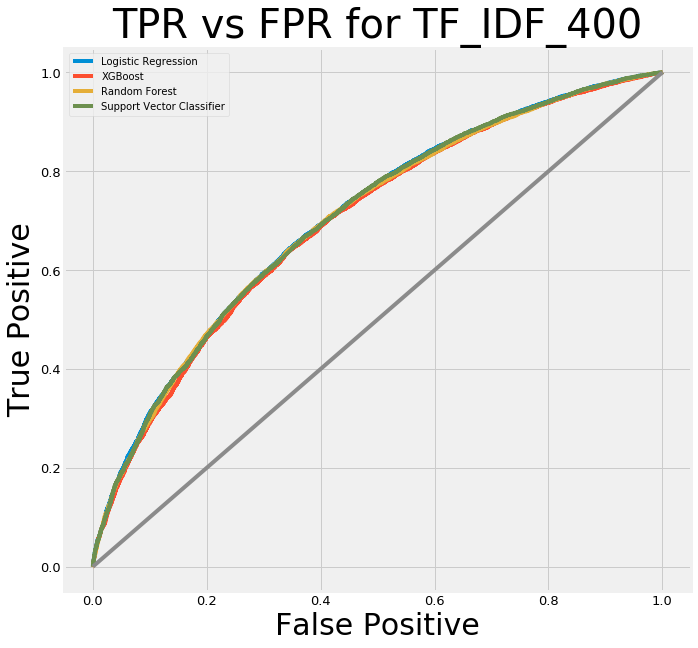

4908.965635061264
a
b
c
d


/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f


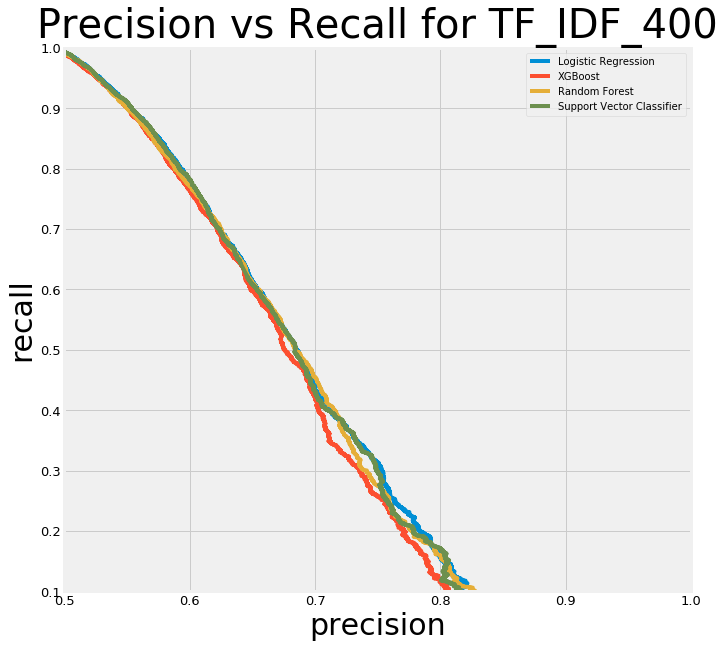

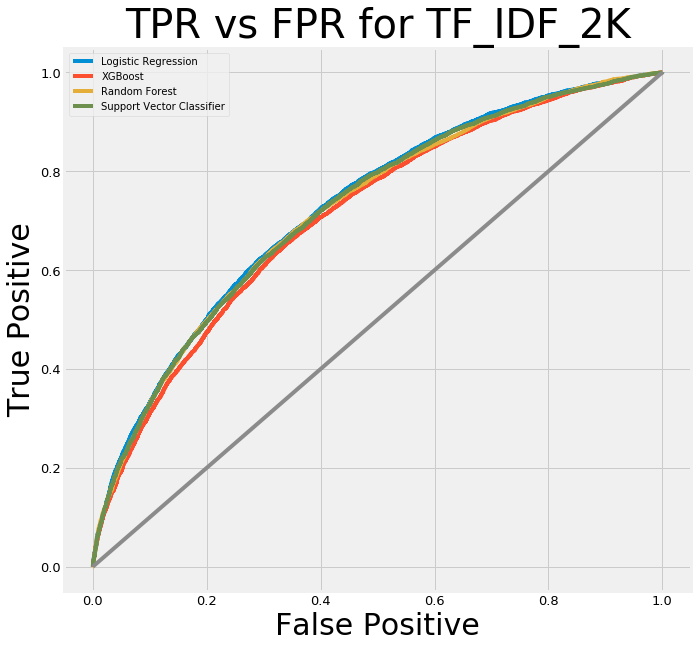

6874.856049776077
a
b
c
d


/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f


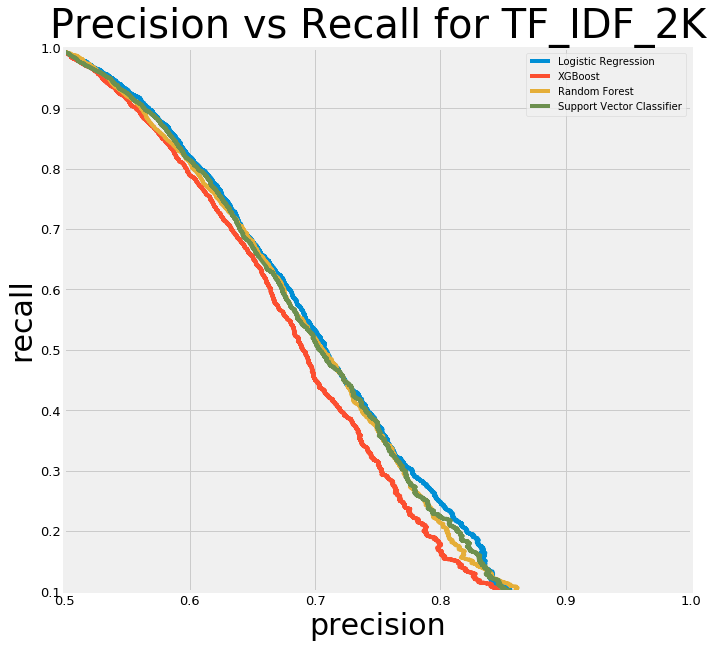

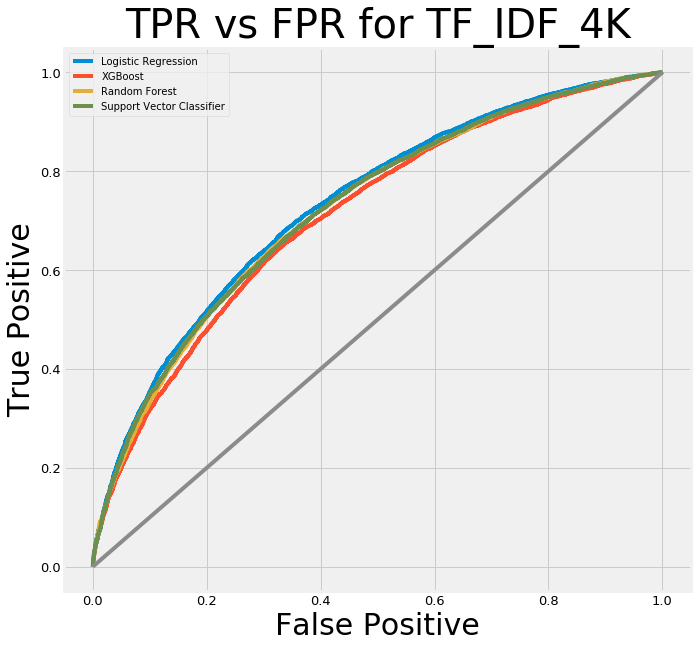

10205.479544878006


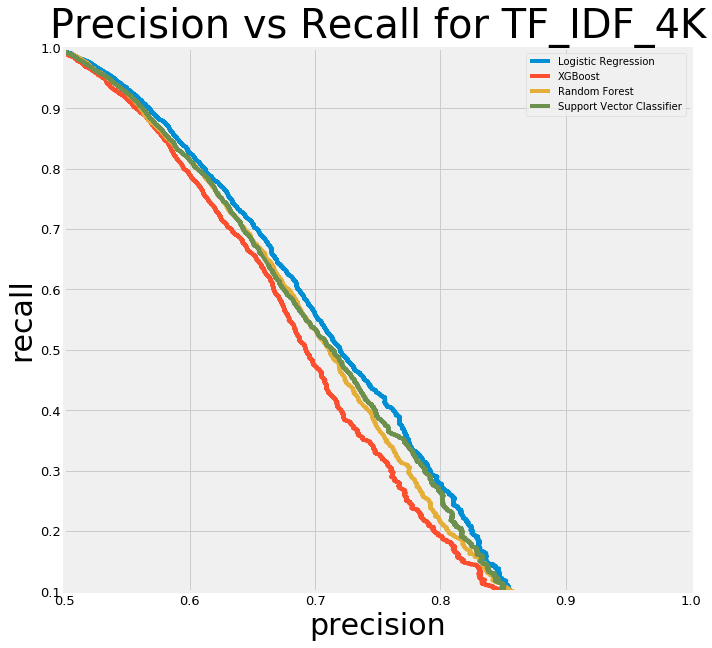

In [12]:
times = []
for data_set_train,data_set_test,name in zip(trains,tests,names):
    ts = time.time()
    print('a')
    SVC_Standard.fit(data_set_train,Train_Y)

    SVC_Standard_predict_proba = SVC_Standard.predict_proba(data_set_test)

    SVC_fpr, SVC_tpr, SVC_thresholds = roc_curve(Test_Y,SVC_Standard_predict_proba[:,1])

    SVC_precision, SVC_recall, SVC_thresholds = precision_recall_curve(Test_Y,SVC_Standard_predict_proba[:,1])

    print('b')
    RF_Standard.fit(data_set_train,Train_Y)

    RF_Standard_predict_proba = RF_Standard.predict_proba(data_set_test)

    RF_fpr, RF_tpr, thresholds = roc_curve(Test_Y,RF_Standard_predict_proba[:,1])

    RF_precision, RF_recall, thresholds = precision_recall_curve(Test_Y,RF_Standard_predict_proba[:,1])
    print('c')

    XG_Standard.fit(data_set_train,Train_Y)

    XG_Standard_predict_proba = XG_Standard.predict_proba(data_set_test)

    XG_fpr, XG_tpr, thresholds = roc_curve(Test_Y,XG_Standard_predict_proba[:,1])

    XG_precision, XG_recall, thresholds = precision_recall_curve(Test_Y,XG_Standard_predict_proba[:,1])

    print('d')

    LR_Standard.fit(data_set_train,Train_Y)

    LR_Standard_predict_proba = LR_Standard.predict_proba(data_set_test)

    LR_fpr, LR_tpr, thresholds = roc_curve(Test_Y,LR_Standard_predict_proba[:,1])

    LR_precision, LR_recall, thresholds = precision_recall_curve(Test_Y,LR_Standard_predict_proba[:,1])

    print('f')
    plt.figure(figsize=(10,10))
    plt.plot(LR_fpr,LR_tpr,label='Logistic Regression')
    plt.plot(XG_fpr,XG_tpr,label='XGBoost')
    plt.plot(RF_fpr,RF_tpr,label='Random Forest')
    plt.plot(SVC_fpr,SVC_tpr,label='Support Vector Classifier')
    plt.plot([0,1],[0,1])
    plt.title('TPR vs FPR for '+name,fontsize=40)
    plt.xlabel('False Positive',fontsize=30)
    plt.ylabel('True Positive',fontsize=30)
    plt.legend(prop={'size': 15})
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend()
    plt.savefig('Viz/'+name+'_ROC_Curve.png')
    plt.show()
    
    

    plt.figure(figsize=(10,10))
    plt.plot(LR_precision,LR_recall,label='Logistic Regression')
    plt.plot(XG_precision,XG_recall,label='XGBoost')
    plt.plot(RF_precision,RF_recall,label='Random Forest')
    plt.plot(SVC_precision,SVC_recall,label='Support Vector Classifier')
    
    plt.title('Precision vs Recall for '+name,fontsize=40)
    plt.xlabel('precision',fontsize=30)
    plt.ylabel('recall',fontsize=30)
    plt.legend(prop={'size': 20})
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    plt.ylim(.1,1)
    plt.xlim(.5,1)
    plt.legend()
    plt.savefig('Viz/'+name+'_Precision_Recall_Curve.png')

    
    
    
    times.append(time.time()-ts)
    print(time.time()-ts)




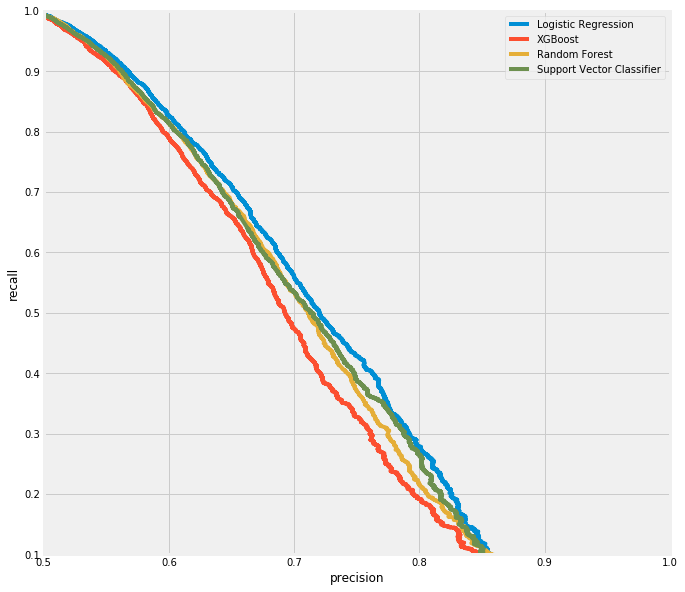

In [13]:
plt.figure(figsize=(10,10))
plt.plot(LR_precision,LR_recall,label='Logistic Regression')
plt.plot(XG_precision,XG_recall,label='XGBoost')
plt.plot(RF_precision,RF_recall,label='Random Forest')
plt.plot(SVC_precision,SVC_recall,label='Support Vector Classifier')

plt.xlabel('precision')
plt.ylabel('recall')
plt.ylim(.1,1)
plt.xlim(.5,1)
plt.legend()
plt.savefig('Viz/All_ModelsPrecision_Recall_Curve.png')

In [14]:
fprs = []
tprs = []

for data_set_train,data_set_test,name in zip(trains,tests,names):
    LR_Standard.fit(data_set_train,Train_Y)

    LR_Standard_predict_proba = LR_Standard.predict_proba(data_set_test)

    LR_fpr, LR_tpr, thresholds = roc_curve(Test_Y,LR_Standard_predict_proba[:,1])

    LR_precision, LR_recall, thresholds = precision_recall_curve(Test_Y,LR_Standard_predict_proba[:,1])
    fprs.append(LR_fpr)
    tprs.append(LR_tpr)
    

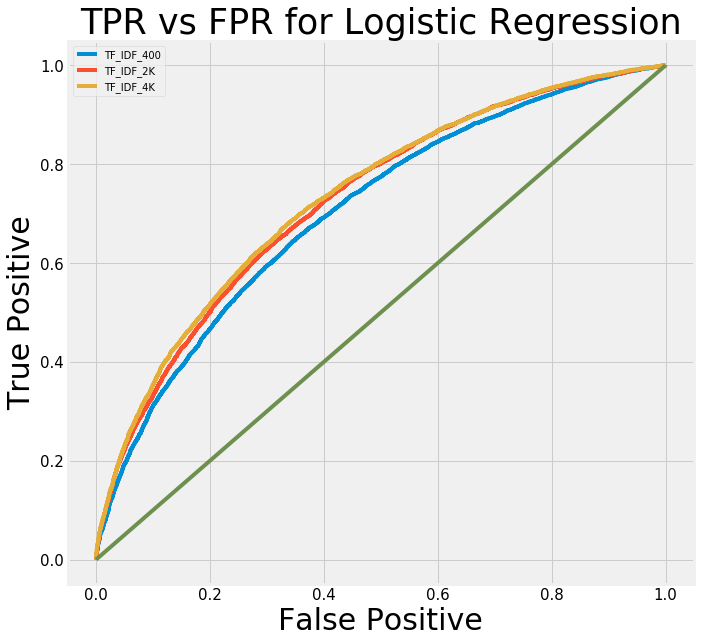

In [15]:
plt.figure(figsize=(10,10))
plt.plot(fprs[0],tprs[0],label=names[0])
plt.plot(fprs[1],tprs[1],label=names[1])
plt.plot(fprs[2],tprs[2],label=names[2])

plt.plot([0,1],[0,1])
plt.title('TPR vs FPR for Logistic Regression',fontsize=35)
plt.xlabel('False Positive',fontsize=30)
plt.ylabel('True Positive',fontsize=30)
plt.legend(prop={'size': 18})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.savefig('Viz/'+'TD_IDF_Size'+'_ROC_Curve.png')
    

(array([10.,  9., 19., 22., 18., 24., 18., 14., 11., 22., 18., 21., 19.,
        26., 37., 18., 18., 25., 17., 22., 18., 20., 14., 18., 19., 21.,
        21., 17., 13., 23., 26., 21., 20., 24., 14., 23., 21., 20., 24.,
        16., 20., 17., 14., 20., 19., 20., 27., 26., 18., 14., 19., 16.,
        13., 17., 28., 21., 26., 18., 20., 18., 22., 22., 14., 16., 19.,
        25., 22., 15., 19., 25., 17., 20., 15., 12., 15., 22., 18., 17.,
        15., 18.,  9., 20., 23., 21., 14., 15., 12., 18., 21., 11., 20.,
        25., 22., 11., 20., 20., 17., 16., 15., 21., 15., 13., 19., 12.,
        23., 17., 21., 20., 17., 19., 18., 21., 17., 10., 19., 16., 18.,
        20., 18., 24., 12., 15.,  9., 14., 25., 10., 10., 23., 16., 10.,
        20., 23., 22., 17., 14., 20., 15., 20., 16., 18., 14., 24., 16.,
        18., 18., 11., 13., 17., 14., 16., 18., 21., 22., 27., 10., 16.,
        15., 18., 13., 15., 16., 11., 21., 19., 22., 15., 19., 22., 20.,
        16., 14., 17., 22., 15., 16., 18., 19., 21.

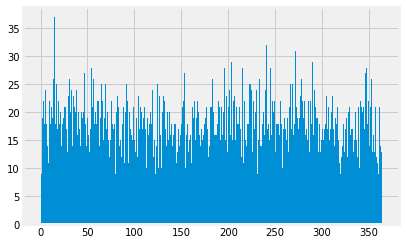

In [16]:
plt.hist(df['14']%365,bins=365)

Text(0, 0.5, 'Hours to Train Model')

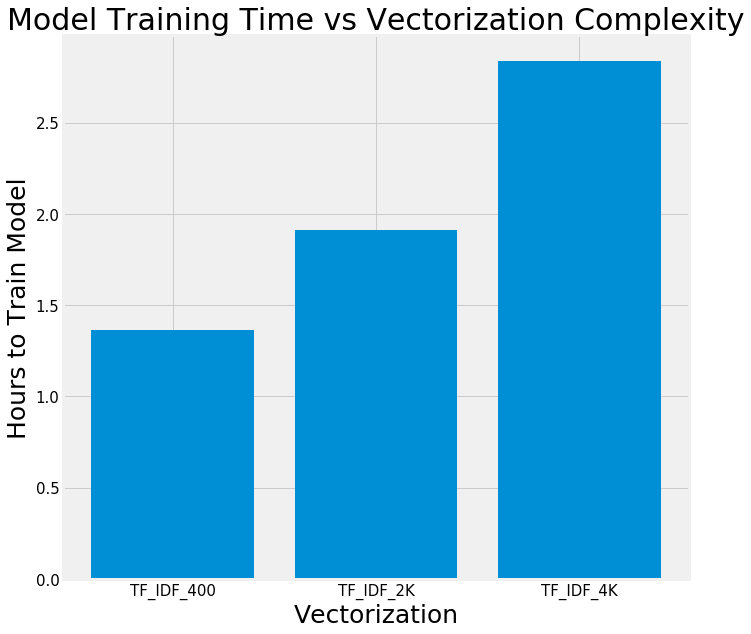

In [32]:
plt.figure(figsize=(10,10))
plt.bar(names,np.array(times) /3600)
plt.title('Model Training Time vs Vectorization Complexity',fontsize=30)
plt.xlabel('Vectorization',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Hours to Train Model',fontsize=25)